# **TUTORIA - EXEMPLO**

## Modelos Lineares

***Estatística para Ciência de Dados***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

---

O arquivo EX0809.csv contém 47 observações e 3 variáveis sem descrições. 

Ajuste um modelo de regressão linear para compreender a associação entre a variável resposta $Y$ e as variáveis preditoras $X_{1}$ e $X_{2}$. Verifique se o modelo é adequado.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import abline_plot

from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# Leitura do conjunto de dados
dados = pd.read_csv('EX0809.txt', sep = '\t')

dados.head()

,Y,X1,X2
0,0.054,0.130,15.5
1,0.154,0.215,15.5
2,0.073,0.250,15.5
3,0.182,0.267,15.5
4,0.241,0.389,15.5


Note que para os dados carregados, nós temos uma variável dependente ($Y$) e duas variáveis independentes ($X_1$ e $X_2$). 

Antes de iniciarmos qualquer modelagem conjunta, vamos tentar entender o comportamento da variável $Y$ em função de alterações sofridas em **apenas uma** das variáveis independentes. 

# **MODELO 01**

## **Gráfico de dispersão $(Y \mbox{ vs. } X_{1})$**

No caso em que a variável $X_2$ é nula, obtemos uma projeção do comportamento de $Y$ com a alteração de $X_1$. Como pode ser observado no gráfico expresso no gráfico a seguir. 

A variação de $Y$ com o aumento de $X_1$ é bastante baixa, isto pode indicar a existência de pouca influência desta variável (pelo menos nesta projeção) sobre variável dependente.

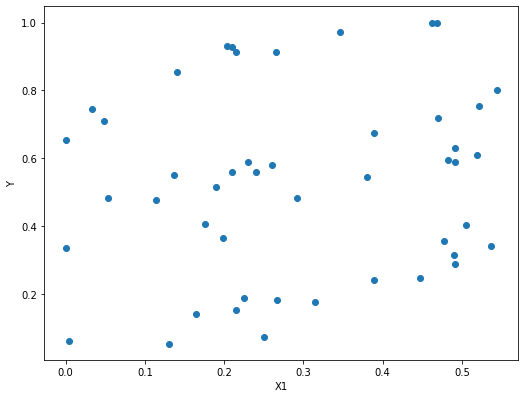

In [ ]:
# ---
# GRAFICO DE DISPERSAO DE 'Y' VS. 'X1'
# ---
plt.rcParams['figure.figsize'] = (8.5,6.5)
plt.scatter(y=dados.Y, x=dados.X1)
plt.ylabel('Y')
plt.xlabel('X1')
plt.show()

## **Ajuste**

A comparação gráfica pode ser constatada com uma modelagem simples dada pela expressão 
$$
  Y=\alpha_0+\alpha_1X_1+\varepsilon.
$$ 

Observe na tabela resumo que podemos verificar a baixa relevância da variável $X_1$ neste modelo, já que o resultado obtido no **Teste $F$ de significância global** constata a insignificância estatística da variável $X_{1}$. 

Por outro lado, o parâmetro $\alpha_0$ é entendido como altamente significante, com um $p$-valor próximo de zero.

Além disso, outras informações confirmam que não existem evidências de que a variável $X_1$ está relacionada com a variável $Y$. Uma outra confirmação destes resultados consiste na observação dos valores de $R$, note que $R^2\approx0,\!019$ e $R^2\mbox{-ajustado}\approx-0,\!003$, o que nos diz que este modelo representa muito pouco os dados tabelados.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Y' VS 'X1'
# ---
mod = ols('Y ~ X1', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8611
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.358
Time:                        19:58:59   Log-Likelihood:                -4.5665
No. Observations:                  47   AIC:                             13.13
Df Residuals:                      45   BIC:                             16.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4601      0.080      5.716      0.0

In [ ]:
p = mod_fit.params
p

Intercept    0.460063
X1           0.223005
dtype: float64

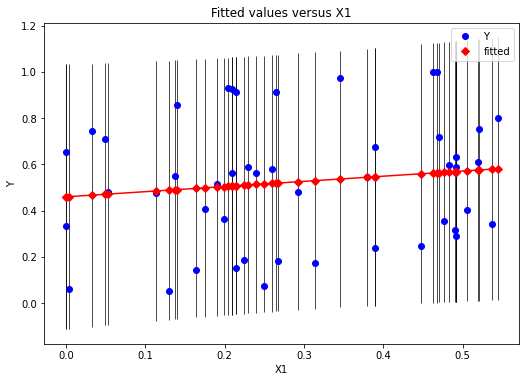

In [ ]:
plt.rcParams['figure.figsize'] = (8.5,6.5)

fig = sm.graphics.plot_fit(mod_fit,'X1')
fig.tight_layout(pad=5.0)

p = mod_fit.params
x = np.linspace(min(dados.X1), max(dados.X1), num=2)
plt.plot(x, p.Intercept + p.X1*x, 'red');

Vamos observar os gráficos que auxiliam na análise dos resíduos, confirmaremos que este ajuste é inadequado, veja nos gráficos seguintes e perceba especialmente que os erros não aparentam seguir uma distribuição normal. 

Utilizando o teste de normalidade Shapiro-Wilk no vetor de resíduos, confirmamos o resultado desta observação ao rejeitarmos a hipótese de normalidade em um nível de significância de 5%.

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

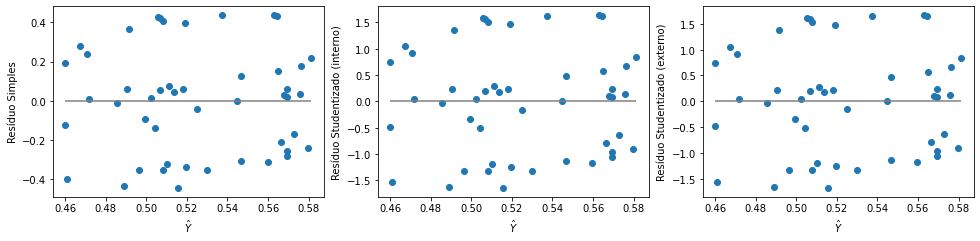

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

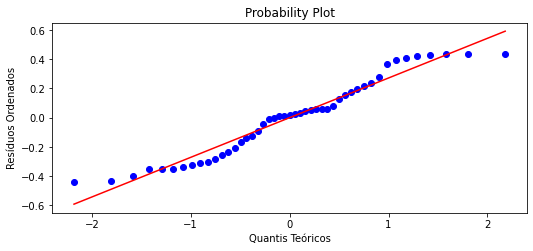

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.024

# **MODELO 02**

Uma análise semelhante pode ser realizada sobre o efeito da variável $X_2$ (na ausência da variável $X_1$) sobre $Y$.

## **Gráfico de dispersão $(Y \mbox{ vs. } X_{2})$**

Observando o gráfico de dispersão de $Y$ em função apenas de $X_2$, podemos constatar que, neste caso, existe relação direta e proporcional entre as variáveis, note que com o aumento de $X_2$ ocorre também um aumento mais expressivo em $Y$. 

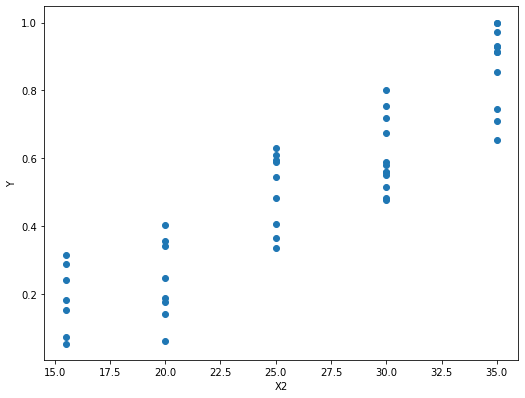

In [ ]:
# ---
# GRAFICO DE DISPERSAO DE 'Y' VS. 'X2'
# ---
plt.rcParams['figure.figsize'] = (8.5,6.5)
plt.scatter(y=dados.Y, x=dados.X2)
plt.ylabel('Y')
plt.xlabel('X2')
plt.show()

## **Ajuste**

Vamos ajustar um modelo simples, dado por
$$
  Y=\gamma_0+\gamma_1X_2+\varepsilon.
$$ 

Perceba que neste modelo tanto o intercepto $\gamma_0$, quanto o parâmetro $\gamma_1$, são significativos para a descrição da variável $Y$.

Observando os coeficientes $R^2\approx0,\!8145$ e $R^2\mbox{-ajustado}\approx0,\!8104$, se o modelo for validado, temos o indicativo de uma boa explicação da variável $Y$, de aproximadamente 81\%.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Y' VS 'X2'
# ---
mod = ols('Y ~ X2', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           4.50e-18
Time:                        01:33:55   Log-Likelihood:                 34.578
No. Observations:                  47   AIC:                            -65.16
Df Residuals:                      45   BIC:                            -61.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4224      0.070     -6.071      0.0

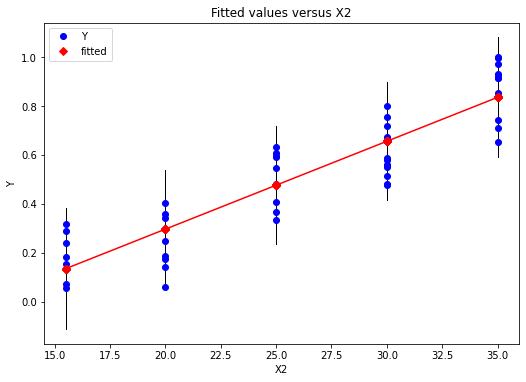

In [ ]:
plt.rcParams['figure.figsize'] = (8.5,6.5)

fig = sm.graphics.plot_fit(mod_fit,'X2')
fig.tight_layout(pad=5.0)

p = mod_fit.params
x = np.linspace(min(dados.X2), max(dados.X2), num=2)
plt.plot(x, p.Intercept + p.X2*x, 'red');

## **Resíduo**

Vamos observar os gráficos dos resíduos desse modelo. 

Mesmo com um bom ajuste aparente, podemos perceber uma não homogeneidade dos erros e ainda é desconfiar de sua normalidade, o teste Shapiro-Wilk finda essa desconfiança e confirma a não normalidade  em um nível de significância de 5%.

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

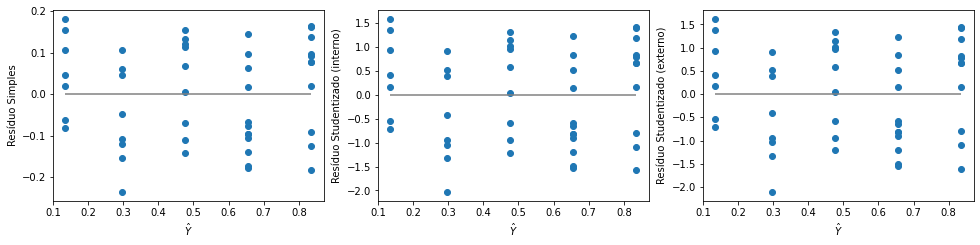

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

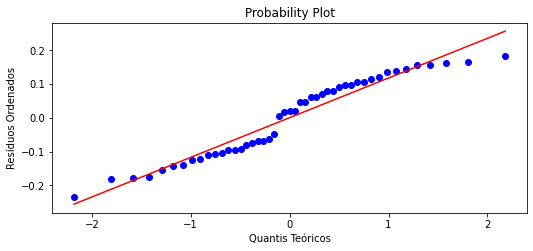

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.012

Além da não normalidade dos erros, observe que para este modelo nós obtivemos $\gamma_0=-0,4224$. Isto indica que quando a variável $X_2$ assumir o valor nulo, a variável resposta $Y$ será $\gamma_0$, um número negativo e, embora não exista qualquer problema nisto, a presença de valores estritamente positivos nas observações de $Y$ pode colocar em dúvida a necessidade deste parâmetro. Vamos desenvolver essa suspeita com a criação do modelo $Y=\gamma X_2$.

# **MODELO 03**

Vamos ajustar um modelo simples, dado por
$$
  Y=\gamma X_2+\varepsilon.
$$ 

A tabela resumo pode ser visualizados a seguir. Os coeficientes de explicação para este modelo são dados por $R^2\approx0,\!930$ e $R^2\mbox{-ajustado}\approx0,\!928$, que indicam aproximadamente 90\% de explicação, se o modelo for validado.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Y' VS 'X2' (SEM INTERCEPTO)
# ---
mod = ols('Y ~ X2-1', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              608.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):                    3.60e-28
Time:                        01:33:41   Log-Likelihood:                          20.517
No. Observations:                  47   AIC:                                     -39.03
Df Residuals:                      46   BIC:                                     -37.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

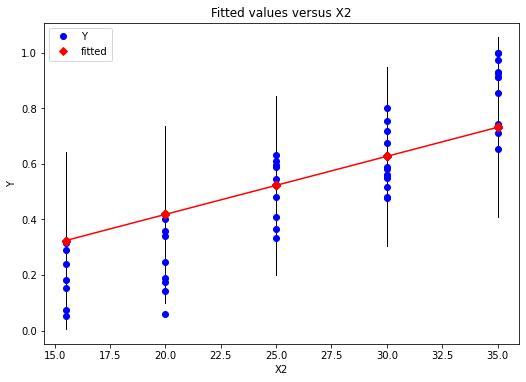

In [ ]:
plt.rcParams['figure.figsize'] = (8.5,6.5)

fig = sm.graphics.plot_fit(mod_fit,'X2')
fig.tight_layout(pad=5.0)

p = mod_fit.params
x = np.linspace(min(dados.X2), max(dados.X2), num=2)
plt.plot(x, p.X2*x, 'red');

## **Resíduo**

Vamos observar os gráficos dos resíduos desse modelo. Os graficos indicam que os erros agora seguem uma distribuição normal (confirmada pelo teste Shapiro-Wilk, em um nível de significância de 5%), no entanto, aparentemente há uma forte dependência entre eles.

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

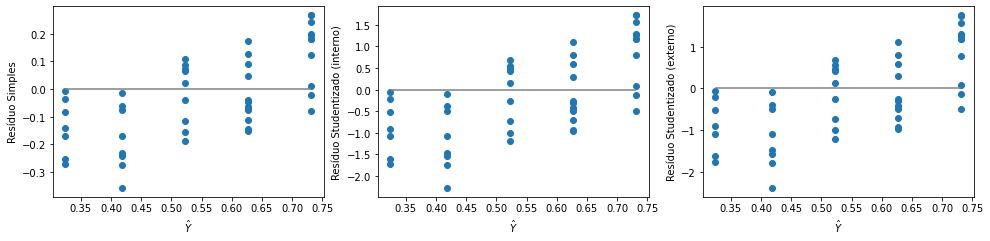

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

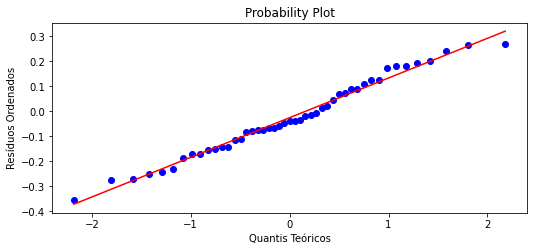

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.562

Perceba na figura a seguir que visualmente o modelo com o intercepto aparesenta um melhor ajuste, contudo, como vimos a insignificância estatística do intercepto na predição dos valores de $Y$, poderíamos optar pelo modelo com mais parsimônia, embora seus erros sejam dependentes e isto não seja adequado.

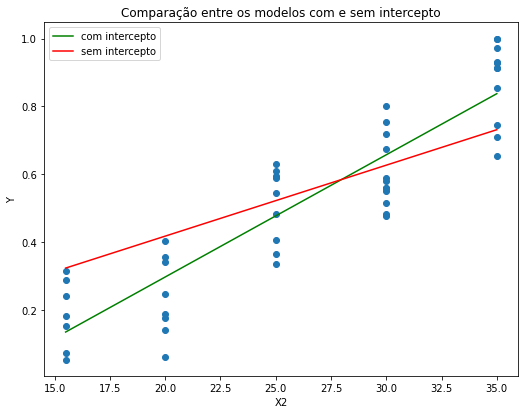

In [ ]:
plt.rcParams['figure.figsize'] = (8.5,6.5)

plt.scatter(y=dados.Y, x=dados.X2)
plt.ylabel('Y')
plt.xlabel('X2')

x = np.linspace(min(dados.X2), max(dados.X2), num=2)
plt.plot(x, -0.4224+0.0360*x, 'green', label='com intercepto');
plt.plot(x, 0.0209*x, 'red', label='sem intercepto')
plt.title('Comparação entre os modelos com e sem intercepto')
plt.legend(loc='upper left')
plt.show();

Se desejarmos investigar o modo como a variável resposta $Y$ se comporta sob a presença de ambas as variáveis preditoras $X_1$ e $X_2$, será que teremos a mesma conclusão?

# **MODELO 04**

Observe na figura a seguir, a matriz de dispersão em que algumas relações entre as variáveis envolvidas (inclusive já discutidas) são expostas.

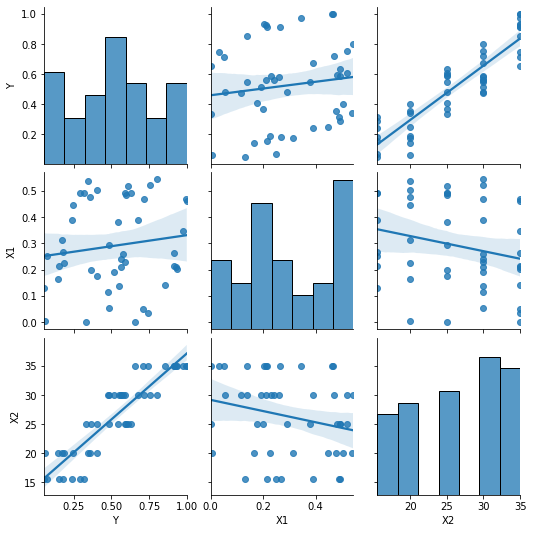

In [ ]:
import seaborn as sns

sns.pairplot(dados, kind='reg');

Nesta matriz nós podemos observar os gráficos anteriormente construídos e obter as informações que já retiramos nas análises anteriories. Além disso, esta matriz fornece informações adicionais sobre o modo como as variáveis preditoras se comportam entre si, neste caso, as relações parecem não ser significantivas.

## **Gráfico de dispersão $(Y \mbox{ vs. } X_{1}\mbox{ e }X_{2})$**

Veja na figura seguinte o gráfico de dispersão dos dados levando em conta ambas as variáveis preditoras.


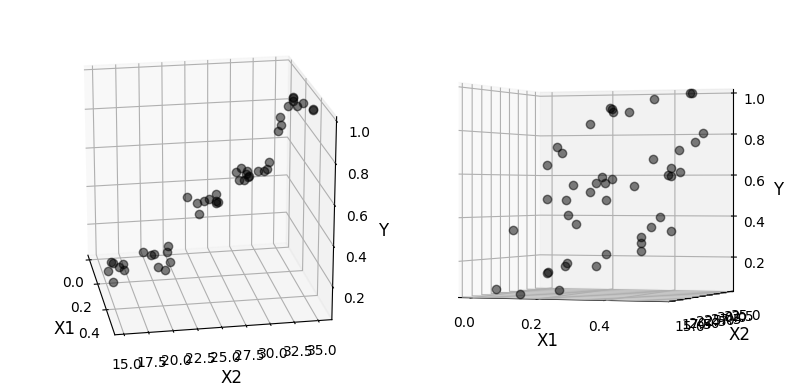

In [ ]:
# Visualização do modelo de regressão múltipla em Python

x = dados.X1
y = dados.X2
z = dados.Y

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=20, azim=-10)
ax2.view_init(elev=0, azim=290)

fig.tight_layout()

## **Ajuste**

Vamos ajustar um modelo linear múltiplo da forma 
$$
  Y=\beta_0+\beta_1X_1+\beta_2X_2.
$$ 

A tabela resumo pode ser visualizados a seguir. Note que neste caso, todos os três parâmetros são estatisticamente significantes.

Os coeficientes de explicação da variável resposta são dados por $R^2\approx0,\!944$ e $R^2\mbox{-ajustado}\approx0,\!941$, o que indica que o modelo (se validado) explica aproximadamente 94\% da variação observada.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Y' VS 'X1' e 'X2'
# ---
mod = ols('Y ~ X1 + X2', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     367.8
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           3.43e-28
Time:                        22:35:24   Log-Likelihood:                 62.541
No. Observations:                  47   AIC:                            -119.1
Df Residuals:                      44   BIC:                            -113.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6888      0.047    -14.646      0.0

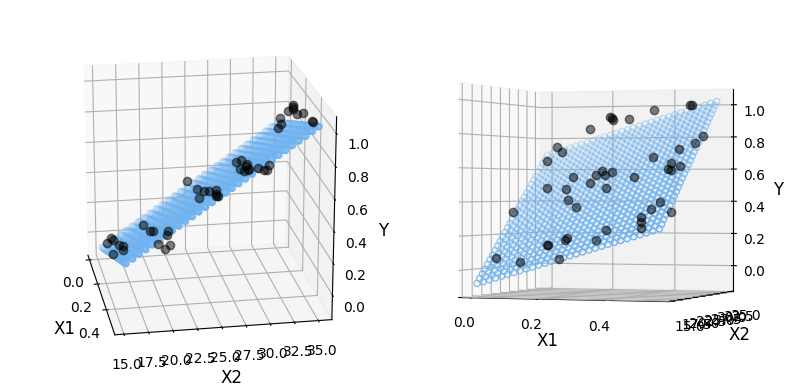

In [ ]:
x = dados.X1
y = dados.X2
z = dados.Y

x_pred = np.linspace(min(x), max(x), 30)
y_pred = np.linspace(min(y), max(y), 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
dados_pred = pd.DataFrame({'X1':xx_pred.flatten(), 'X2':yy_pred.flatten()})

predicted = mod_fit.predict(dados_pred)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('X1', fontsize=12)
    ax.set_ylabel('X2', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=20, azim=-10)
ax2.view_init(elev=0, azim=290)


# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

## **Resíduo**

Vamos analisar se o ajuste é adequado. Nos gráficos a seguir temos a suspeita de que os erros não tenham normalidade, mas pelo teste Shapiro-Wilk podemos considerar que eles seguem uma distribuição normal. Além disso, aparentemente os erros não são independentes. 

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

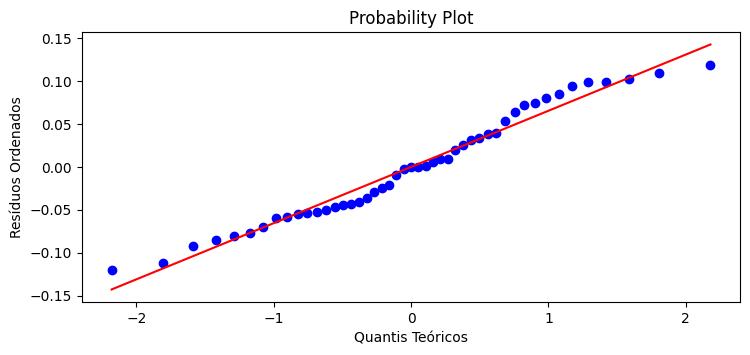

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.152

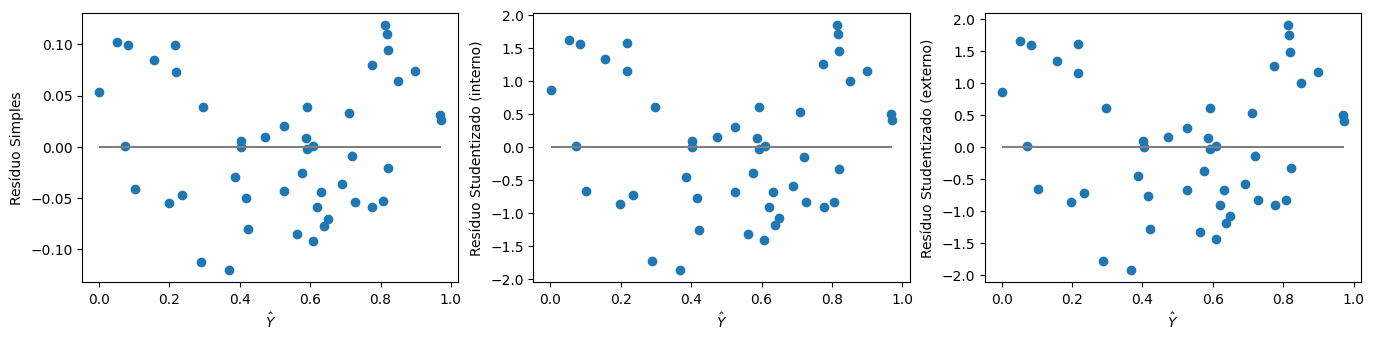

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

# **MODELO 5**

Vamos tentar contornar a situação com uma transformação de Box-Cox.

In [ ]:
dados['Ybc'], lambda_BoxCox = stats.boxcox(dados['Y'])
dados.head()

,Y,X1,X2,X22,Ybc
0,0.054,0.130,15.5,240.25,-1.161869
1,0.154,0.215,15.5,240.25,-0.991419
2,0.073,0.250,15.5,240.25,-1.125976
3,0.182,0.267,15.5,240.25,-0.949175
4,0.241,0.389,15.5,240.25,-0.864711


## **Ajuste**

Vamos ajustar um modelo linear múltiplo da forma 
$$
  Y_{bc}=\beta_0+\beta_1X_1+\beta_2X_2.
$$

A tabela resumo pode ser visualizados a seguir. Note que neste caso, todos os três parâmetros são estatisticamente significantes.

Os coeficientes de explicação da variável resposta aumentaram um pouco, $R^2\approx0,\!951$ e $R^2\mbox{-ajustado}\approx0,\!949$, indicando uma explicação aproximada de 95\%, se o modelo for validado.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Ybc' VS 'X1' e 'X2'
# ---
mod = ols('Ybc ~ X1+X2', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    Ybc   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.3
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.30e-29
Time:                        22:36:38   Log-Likelihood:                 57.442
No. Observations:                  47   AIC:                            -108.9
Df Residuals:                      44   BIC:                            -103.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9971      0.052    -38.099      0.0

## **Resíduo**

Vamos analisar se o ajuste é adequado. Nos gráficos a seguir temos a suspeita de que os erros não tenham normalidade, mas pelo teste Shapiro-Wilk podemos considerar que eles seguem uma distribuição normal. Além disso, aparentemente os erros não são independentes. 

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

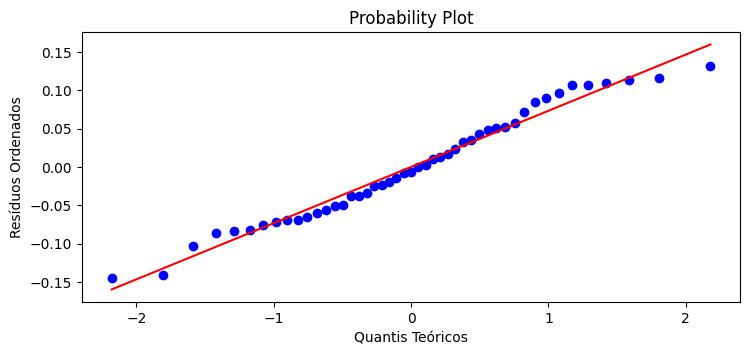

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.266

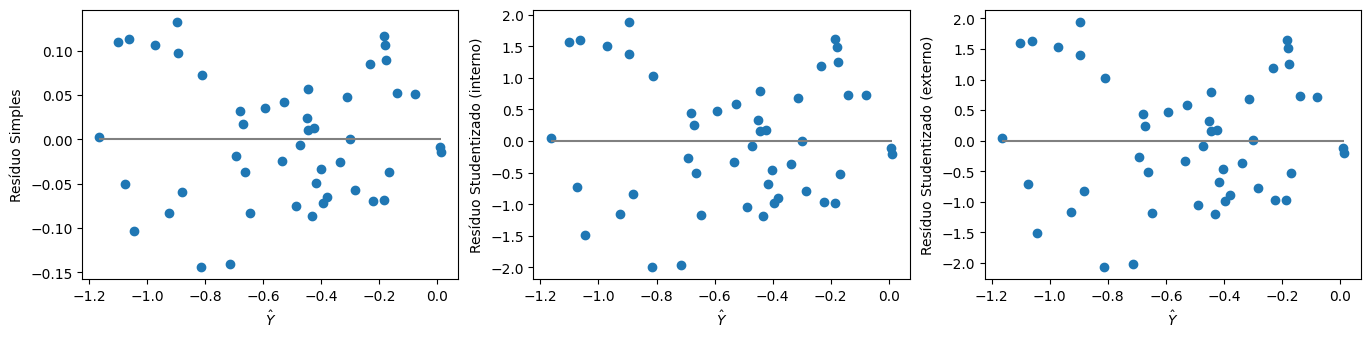

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

# **MODELO 06**

Os ajustes realizados até agora se mostraram inadequados em um ou outro aspecto, isto indica que devemos repensar a modelagem e analisar características mais profundas das variáveis preditoras. Observe por exemplo que o gráfico de $Y(X_1)$ aparenta uma excessiva, mas ordenada, dispersão. Por outro lado, a variável $X_2$ categoriza os dados em extratos distintos, isto é, $X_2$ parece ser, em essência, uma variável categórica. Observe na figura seguinte, a relação exibida pelo gráfico de $Y(X_1)$ quando categorizamos as observações em função da variável $X_2$.

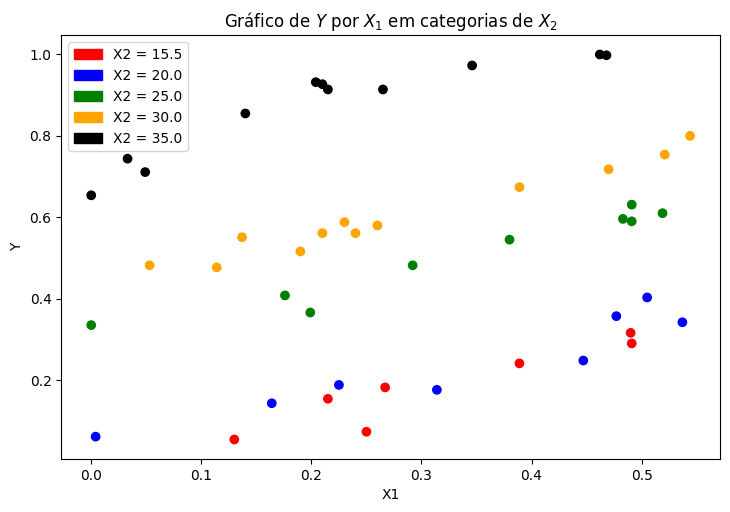

In [ ]:
# ---
# DEFININDO A COR DE CADA CATEGORIA
# ---

def cor(x):
  if x == 15.5:
    return('red')
  elif x == 20:
    return('blue')
  elif x == 25:
    return('green')
  elif x == 30:
    return('orange')
  else:
    return('black')

cores = dados.X2.apply(cor)

# ---
# DEFININDO A LEGENDA MANUALMENTE
# ---

red_patch = mpatches.Patch(color='red', label='X2 = 15.5')
blue_patch = mpatches.Patch(color='blue', label='X2 = 20.0')
green_patch = mpatches.Patch(color='green', label='X2 = 25.0')
orange_patch = mpatches.Patch(color='orange', label='X2 = 30.0')
black_patch = mpatches.Patch(color='black', label='X2 = 35.0')

# 

plt.rcParams['figure.figsize'] = (8.5,5.5)

fig, ax = plt.subplots()
graf = ax.scatter(x=dados.X1, y=dados.Y, c=cores)
ax.set_ylabel('Y')
ax.set_xlabel('X1')
ax.set_title('Gráfico de $Y$ por $X_1$ em categorias de $X_2$')
plt.legend(handles=[red_patch, blue_patch, green_patch, orange_patch, black_patch])
plt.show()

Agora está claro que a dispersão no gráfico de $Y$ versus $X_{1}$ não é devido ao acaso.

## **Ajuste**

Vamos ajustar um modelo que pode ser expresso por

$$
Y=\lambda_0+\beta X_1+\lambda_1X_{2_{20}}+\lambda_2X_{2_{25}}+\lambda_3X_{2_{30}}+\lambda_4X_{2_{35}} \ ,
$$

com quatro variáveis _dummy_ da forma

$$
X_{2_k} = \left\{\begin{array}{cl}1&\mbox{se }X_2=k\\0&\mbox{c.c.}\end{array}\right. \ .
$$

Os resumos do modelo indicam que, com excessão do intercepto, todos os parâmetros são significativos em um nível de 5\%. Seus coeficientes de explicação são dados por $R^2\approx0,\!984$ e $R^2\mbox{-ajustado}\approx0,\!982$, o que indica uma altíssima explicação da variação dos dados, se o modelo for validado.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Ybc' VS 'X1' e 'X2'
# ---
mod = ols('Y ~ X1+C(X2)', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     513.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           7.87e-36
Time:                        13:56:10   Log-Likelihood:                 92.589
No. Observations:                  47   AIC:                            -173.2
Df Residuals:                      41   BIC:                            -162.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0151      0.017     -0.874

## **Resíduo**

Observando os gráficos dos resíduos, desconfiamos que finalmente os erros tem normalidade e independência, o que foi confirmado pelos testes Shapiro-Wilk e Durbin-Watson respectivamente. 

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

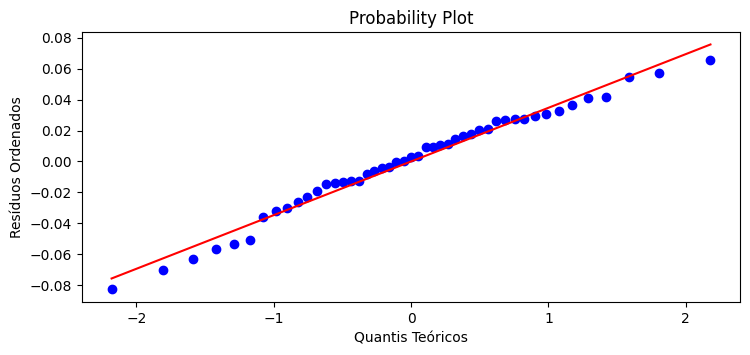

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.52

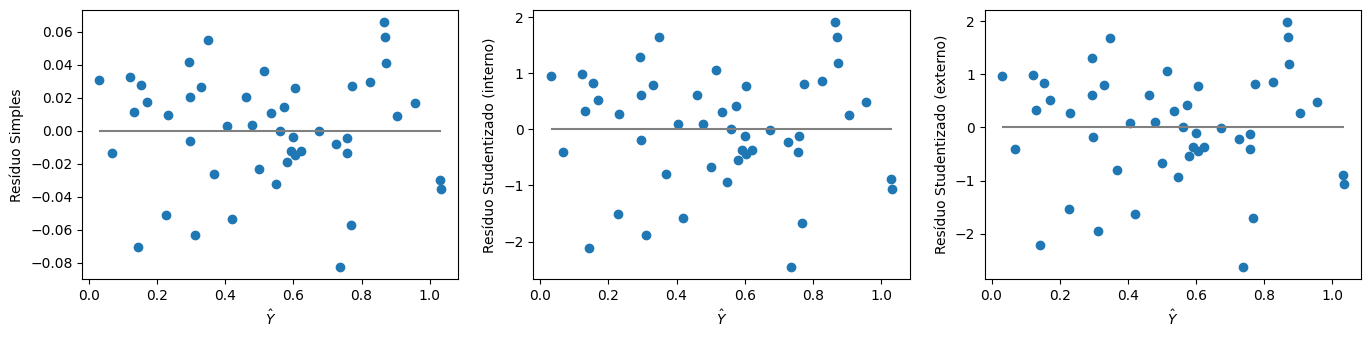

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

In [ ]:
p = mod_fit.params
p

Intercept       -0.015105
C(X2)[T.20.0]    0.042923
C(X2)[T.25.0]    0.308490
C(X2)[T.30.0]    0.442776
C(X2)[T.35.0]    0.751903
X1               0.634291
dtype: float64

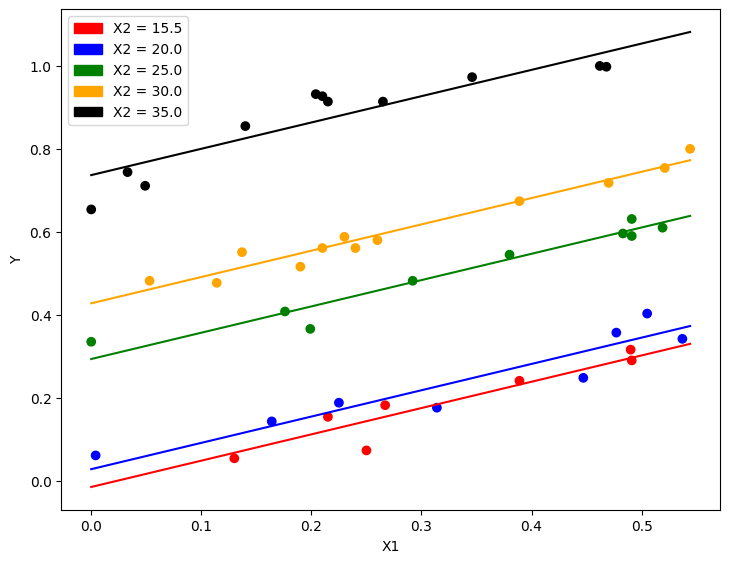

In [ ]:
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (8.5,6.5)

x = np.linspace(min(dados.X1), max(dados.X1), num=2)

fig, ax = plt.subplots()
graf = ax.scatter(x=dados.X1, y=dados.Y, c=cores)
ax.plot(x, p.Intercept + p.X1*x, color='red');
ax.plot(x, p.Intercept + p['C(X2)[T.20.0]'] + p.X1*x, color='blue');
ax.plot(x, p.Intercept + p['C(X2)[T.25.0]'] + p.X1*x, color='green');
ax.plot(x, p.Intercept + p['C(X2)[T.30.0]'] + p.X1*x, color='orange');
ax.plot(x, p.Intercept + p['C(X2)[T.35.0]'] + p.X1*x, color='black');
ax.set_ylabel('Y')
ax.set_xlabel('X1')
plt.legend(handles=[red_patch, blue_patch, green_patch, orange_patch, black_patch])
plt.show()

# **MODELO 07**

Agora temos um modelo adequadamente ajustado, vamos verificar se a retirada do intercepto é interessante, já que foi constatada sua insignificância estatística. Considere o modelo 

$$
Y=\beta X_1+\lambda_1X_{2_{15,5}}+\lambda_2X_{2_{20}}+\lambda_3X_{2_{25}}+\lambda_4X_{2_{30}}+\lambda_5X_{2_{35}}.
$$

Seu resumo e gráficos diagnósticos são dados a seguir.

In [ ]:
# ---
# AJUSTE DO MODELO LINEAR SIMPLES PARA 'Y' VS 'X1' e 'cat(X2)' (sem intercepto)
# ---
# dados.X2[dados.X2==20] = 15.5 
mod = ols('Y ~ X1+C(X2)-1', data=dados)
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     581.7
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.62e-36
Time:                        00:38:33   Log-Likelihood:                 89.750
No. Observations:                  47   AIC:                            -169.5
Df Residuals:                      42   BIC:                            -160.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(X2)[15.5]     0.0071      0.015      0.474      

## **Resíduo**

Observando os gráficos dos resíduos, desconfiamos que finalmente os erros tem normalidade e independência, o que foi confirmado pelos testes Shapiro-Wilk e Durbin-Watson respectivamente. 

In [ ]:
# ---
# Valores preditos: Yhat
# ---
mod_Yhat = mod_fit.fittedvalues

# ---
# Resíduo: Observado - Ajustado
# ---
mod_residuo = mod_fit.resid

# ---
# Objeto para a análise de pontos influentes
# ---
mod_infl = mod_fit.get_influence()

# ---
# Resíduo Studentizado (internamente)
# ---
mod_res_stud = mod_infl.resid_studentized_internal

# ---
# Resíduo Studentizado com i-ésima observação deletada (externamente)
# ---
mod_res_stud_del = mod_infl.resid_studentized_external

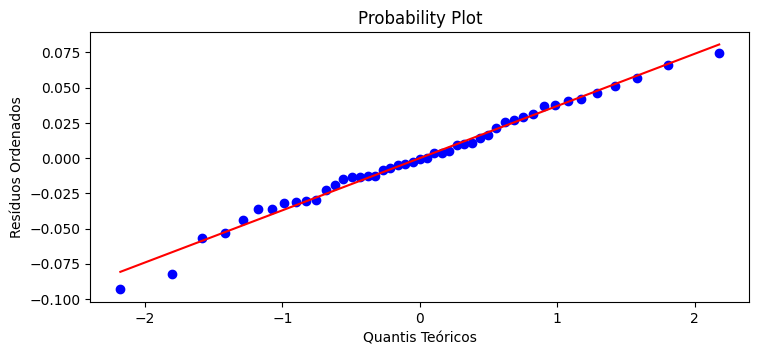

In [ ]:
# ---
# Verificando a suposição de distribuição Normal dos resíduos
# ---
plt.rcParams['figure.figsize'] = (8.5,3.5)
stats.probplot(mod_residuo, plot=plt)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Ordenados')
plt.show()

In [ ]:
(mod_shapiro_est, mod_shapiro_p) = stats.shapiro(mod_residuo)
round(mod_shapiro_p,3)

0.918

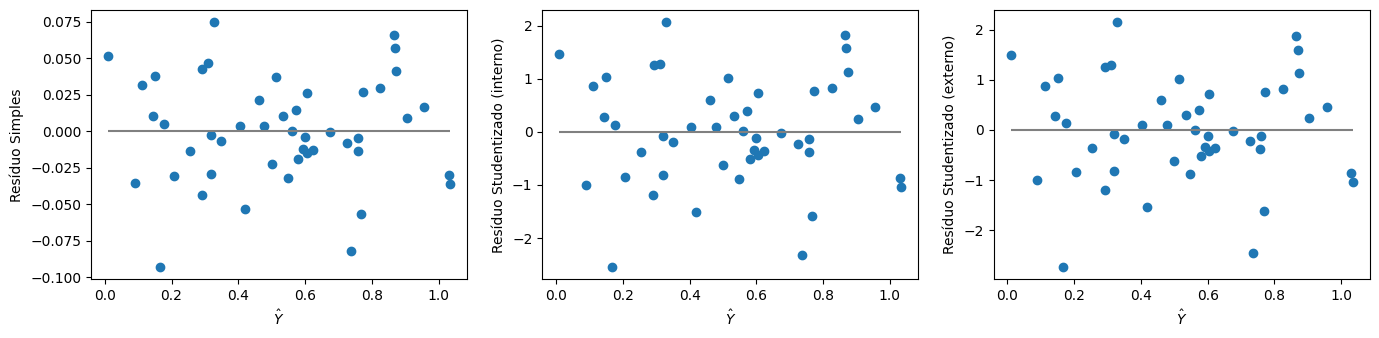

In [ ]:
plt.rcParams['figure.figsize'] = (16.5,3.5)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(mod_Yhat, mod_residuo)
ax1.set_ylabel('Resíduo Simples')
ax1.set_xlabel('$\hat{Y}$')
ax1.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax2.scatter(mod_Yhat, mod_res_stud)
ax2.set_ylabel('Resíduo Studentizado (interno)')
ax2.set_xlabel('$\hat{Y}$')
ax2.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray')

ax3.scatter(mod_Yhat, mod_res_stud_del)
ax3.set_ylabel('Resíduo Studentizado (externo)')
ax3.set_xlabel('$\hat{Y}$')
ax3.hlines(0, xmin=min(mod_Yhat), xmax=max(mod_Yhat), color='gray');

In [ ]:
p = mod_fit.params
p

C(X2)[15.5]    0.007113
C(X2)[25.0]    0.292691
C(X2)[30.0]    0.427094
C(X2)[35.0]    0.736349
X1             0.636353
dtype: float64

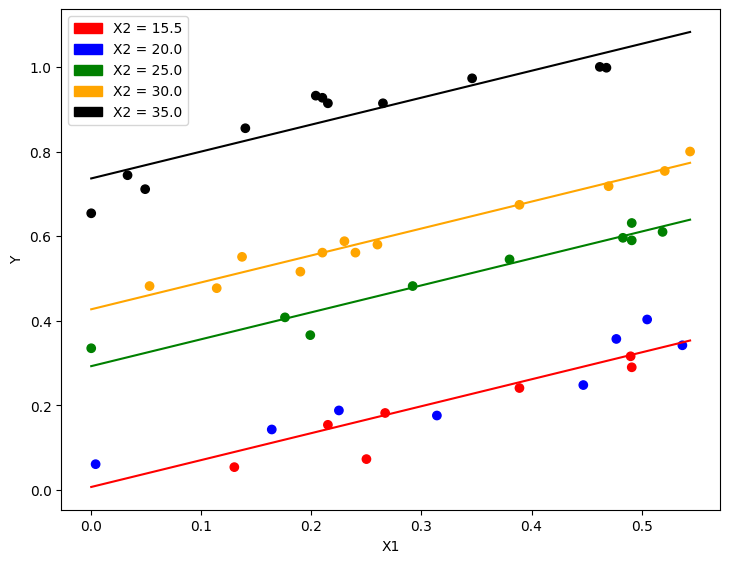

In [ ]:
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (8.5,6.5)

x = np.linspace(min(dados.X1), max(dados.X1), num=2)

fig, ax = plt.subplots()
graf = ax.scatter(x=dados.X1, y=dados.Y, c=cores)
ax.plot(x, p['C(X2)[15.5]'] + p.X1*x, color='red');
ax.plot(x, p['C(X2)[20.0]'] + p.X1*x, color='blue');
ax.plot(x, p['C(X2)[25.0]'] + p.X1*x, color='green');
ax.plot(x, p['C(X2)[30.0]'] + p.X1*x, color='orange');
ax.plot(x, p['C(X2)[35.0]'] + p.X1*x, color='black');
ax.set_ylabel('Y')
ax.set_xlabel('X1')
plt.legend(handles=[red_patch, blue_patch, green_patch, orange_patch, black_patch])
plt.show()

Modelo final?

$$
  \widehat{E}(Y|X_{1},X_{2}) = \widehat{Y} = 
  \begin{cases}
    -0.015 + 0.634X_{1} & \mbox{se }X_{2}=15.5, \\
     0.028 + 0.634X_{1} & \mbox{se }X_{2}=20.0, \\
     0.293 + 0.634X_{1} & \mbox{se }X_{2}=25.0, \\
     0.428 + 0.634X_{1} & \mbox{se }X_{2}=30.0, \\
     0.737 + 0.634X_{1} & \mbox{se }X_{2}=35.0.
  \end{cases}
$$

Com os dois últimos modelos nós obtivemos altos coeficientes de explicação da variável resposta, erros normais e independentes, contudo, a retirada de $\lambda_0$ evidenciou a insignificância de dois coeficientes, das categorias $X_{2_{15,5}}$ e $X_{2_{20}}$. Como proceder?